In [1]:
import tensorflow as tf

In [5]:
# a toy ResNet model:
inputs = tf.keras.Input(shape = (32, 32, 3), name = "img")
x = tf.keras.layers.Conv2D(32, 3, activation="relu")(inputs)
x = tf.keras.layers.Conv2D(64, 3, activation = "relu") (x)
block_1_output = tf.keras.layers.MaxPooling2D(3)(x)

x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = tf.keras.layers.add([x, block_1_output])

x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = tf.keras.layers.add([x, block_2_output])

x = tf.keras.layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(10)(x)

In [6]:
model = tf.keras.Model(inputs, outputs, name = "toy_resnet")

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_3 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_2[0][0]']               
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_3[0][0]']               
                                                                                         

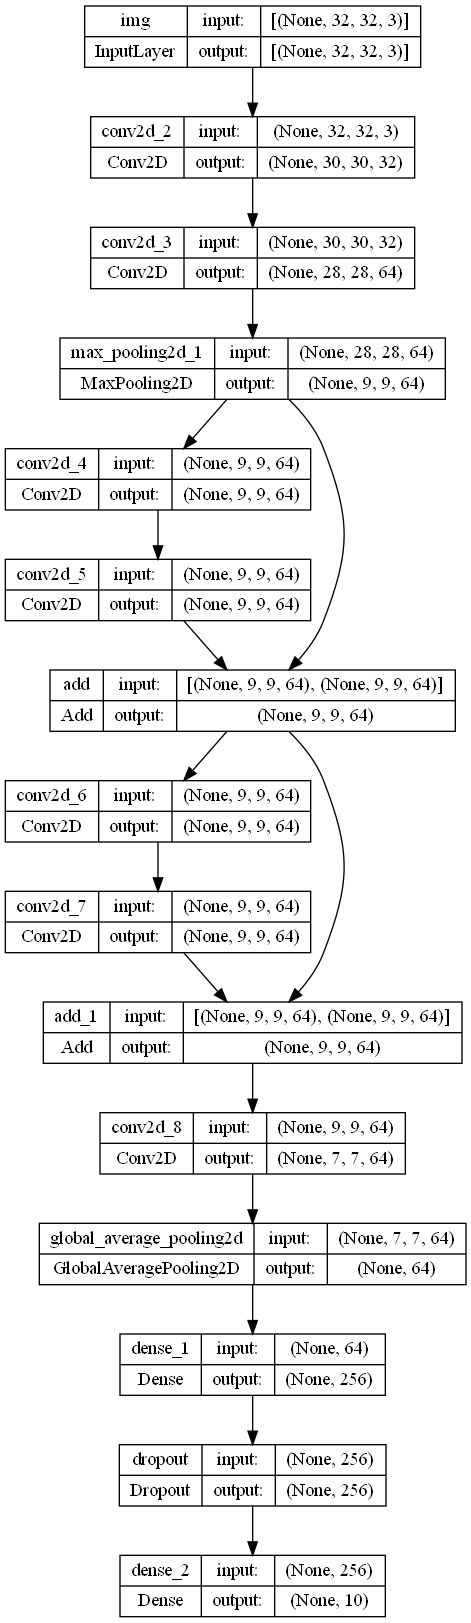

In [8]:
model.summary()
tf.keras.utils.plot_model(model, "mini_resnet.png", show_shapes = True)

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



170498071/170498071 [==============================] - 12s 0us/step


In [11]:

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)

# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 36s 57ms/step - loss: 1.4813 - acc: 0.4555 - val_loss: 1.5244 - val_acc: 0.4652
Epoch 2/5
625/625 [==============================] - 35s 55ms/step - loss: 1.2536 - acc: 0.5464 - val_loss: 1.1745 - val_acc: 0.5732
Epoch 3/5
625/625 [==============================] - 35s 56ms/step - loss: 1.0825 - acc: 0.6162 - val_loss: 0.9665 - val_acc: 0.6524
Epoch 4/5
625/625 [==============================] - 35s 57ms/step - loss: 0.9647 - acc: 0.6601 - val_loss: 0.8915 - val_acc: 0.6820
Epoch 5/5
625/625 [==============================] - 35s 56ms/step - loss: 0.8701 - acc: 0.6974 - val_loss: 0.8622 - val_acc: 0.7015
